# 线性模型
要点：MSE，交叉熵损失函数

## 逻辑回归
logistic distributition；此处对数几率函数：$y = \frac{1}{1+e^{-(wx+b)}}$代替阶跃函数（考虑假设2分类$wx$与0关系来划分正负例）

对数几率($logit(p) = log\frac{p}{1-p} = log \frac{P(Y=1|x)}{1 - P(Y=1|x)}=w \cdot x$)，`输出Y=1的对数几率就是输入x的线性函数`，于是，可以推导出,特性x时，Y=1的条件概率：$P(Y=1|x) = \frac{e^{\omega x}}{1 + e^{\omega x}}$

于是极大似然估计求参数：$L(w) = \prod_{i=1}^{N} [P(Y=1|x)]^{y_i}[1 - P(Y=1|x)]^{1 - y_i}$，最大对数似然推导如下：
$$
\iota (\omega ) = {\sum_{i=1}^{N}[y_iln P + (1 - y_i)ln(1 - P]\\
=\sum_{i=1}^{N}[y_iln\pi(x) + (1 - y_i)ln(1 - \pi(x))]\\
= \sum_{i=1}^{N}[y_iln\frac{\pi(x)}{1-\pi(x)} + ln(1-\pi(x))],将式子拆开,按照y_i合并\\
=\sum_{i=1}^{N}[y_i(w \cdot x_i) - ln(1 + e^{w \cdot x_i})]}
$$

### 传统GD推导
$$
{
h_{\theta}(x^i) = \frac{1}{1 + e^{-{\theta}^Tx^{i}}}\\
J(\theta)=-\sum_{i=1}^{m}(y^{i}log\ {h_{\theta}(x^i)} + (1 - y^i)log(1 - h_{\theta}(x^i))
}
$$
第一步：求基础导数:
$$
{{h_{\theta}(x^i)}' = \frac{e^{-{\theta}^Tx^{i}}\cdot x_{j}^{i}}{(1 + e^{-{\theta}^Tx^{i}})^2} \\
{1 - h_{\theta}(x^i)}' = -{h_{\theta}(x^i)}'
}
$$
第二步：损失函数求导（凸函数，使用GD训练），第一步公式代入
$$
{\frac{\partial J(\theta)}{\partial \theta_j}=-\sum_{i=1}^{m}(y^{i}{h_{\theta}(x^i)}' \cdot \frac{1}{h_{\theta}(x^i)} + (1 - y^i){(1 - h_{\theta}(x^i))}' \cdot \frac{1}{1 - h_{\theta}(x^i)}) \\
= x_{j}^{i}\sum_{i}(h_{\theta}(x^i) - y^i)
}
$$


### 多分类问题
one vs one：两两作为反例，训练分类器，于是就有N(N-1)/2个分类结果。预测时进行投票

one vs rest：训练N个分类器。预测时，如果只有一个为正例，那就是这个分类，如果有多个，则选阈值最大的

many vs many(ECOD算法)

### 类别不均衡问题
本身优化的是对数几率，阈值设置为0.5也表明分类器认为正负样例相同，当正反不同时，令$m^+$为正样例数，$m^-$负样例数。基于假设：`无偏采样`，于是，理想情况
$$
\frac{y}{1-y} > \frac{m^+}{m^-}
$$
就判定为正。

但是分类器是根据：$\frac{y}{1-y} > 1$来决策。于是，可以对公式进行简单修改：
$$
\frac{{y}'}{1 - {y}'} = \frac{y}{1-y} \cdot \frac{m^-}{m^+}
$$
这就是缩放技术。也就是上一个式子两边乘以$\frac{m^-}{m^+}$转换为了机器学习人类其的决策方法。`难点在于：训练集是无偏采样，无法根据上式推断出真是的对数几率`。

实际操作中采用的三个方法：

1）欠采样，直接对反例进行欠采样，去掉一些反例，让正负样例均衡。

时间开销低，如果随机丢失，会导致丢掉重要信息，最合适的是`使用集成学习机制，反例分成若干分，供不同学习器使用`，看起来每个学习器欠采样，总体却不会。

2）过采样，增加一些正例，是正负样例均衡

不能简单的对初始样本进行采样，否则会严重的过拟合。需要使用插值来产生新的样例。如SMOTE算法。

3）直接使用原始训练集训练，用分类器预测时，将$\frac{{y}'}{1 - {y}'} = \frac{y}{1-y} \cdot \frac{m^-}{m^+}$嵌入到决策过程，称为阈值转移。


In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.datasets.samples_generator import make_regression
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
import ml_tools
from sklearn.model_selection import train_test_split

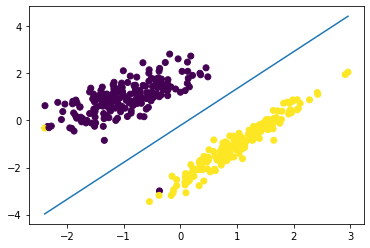

In [6]:
# 画图展现：wx ～ 0来表明正负例关系
X1, Y1 = make_classification(n_samples=400, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=2)
# 暂时不用
clf = LogisticRegression(C=1e5, max_iter=50000)
# Create an instance of Logistic Regression Classifier and fit the data.
clf.fit(X1, np.ravel(Y1))
import copy
xl = copy.deepcopy(X1[:, 0])
xl.sort()
Y1_V = []
for i in xl:
    v = clf.coef_[0][0]/clf.coef_[0][1] * i * -1 -  clf.intercept_/clf.coef_[0][1]
    Y1_V.append(v)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.plot(xl, Y1_V)
plt.show()

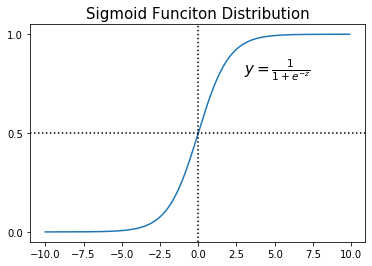

In [8]:
# sigmod函数
def Sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
h = Sigmoid(x)  # Sigmoid函数
plt.plot(x, h)
plt.axvline(0.0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0,  0.5, 1.0])  # y axis label
plt.title(r'Sigmoid Funciton Distribution', fontsize = 15)
plt.text(3,0.8,r'$y = \frac{1}{1+e^{-z}}$', fontsize = 15)
#plt.text(3,0.6,r'$x = wz+b$', fontsize = 18)
plt.show()

In [9]:
# 读取数据
data = pd.read_csv('./heart_disease/processed.cleveland.data')
# 处理异常值
data["ca"] = pd.to_numeric(data["ca"], errors='coerce').fillna(method='ffill')
data["thal"] = pd.to_numeric(data["thal"], errors='coerce').fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age           303 non-null float64
sex           303 non-null float64
cp            303 non-null float64
trestbps      303 non-null float64
chol          303 non-null float64
fbs           303 non-null float64
restecg       303 non-null float64
thalach       303 non-null float64
exang         303 non-null float64
oldpeak       303 non-null float64
slope         303 non-null float64
ca            303 non-null float64
thal          303 non-null float64
predictnum    303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [10]:
# 处理label：label分为5类0,1,2,3,4,5
for idx,row in data.iterrows():
    data.loc[idx,"label0"] = 0
    data.loc[idx,"label1"] = 0
    data.loc[idx,"label2"] = 0
    data.loc[idx,"label3"] = 0
    data.loc[idx,"label4"] = 0
    if row["predictnum"] == 0:
        data.loc[idx,"label0"] = 1
    elif row["predictnum"] == 1:
        data.loc[idx,"label1"] = 1
    elif row["predictnum"] == 2:
        data.loc[idx,"label2"] = 1
    elif row["predictnum"] == 3:
        data.loc[idx,"label3"] = 1
    elif row["predictnum"] == 4:
        data.loc[idx,"label4"] = 1
    else:
        pass
    
    # 增加而分类标签
    if row["predictnum"] == 0:
        data.loc[idx,"bin_label"] = 0
    else:
        data.loc[idx,"bin_label"] = 1


In [12]:
feature_index = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# 特征
X = data[feature_index].values
# 输出值
y = data[["predictnum"]].values
y_all=data[["predictnum", "label0","label1","label2","label3","label4"]].values

In [15]:
# 抽样
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y_all, random_state=1)
# 暂时不用
clf = LogisticRegression(C=1e5, max_iter=50000)
# Create an instance of Logistic Regression Classifier and fit the data.
clf.fit(X_train, np.ravel(y_train_all[:,0]))

LogisticRegression(C=100000.0, max_iter=50000)

In [16]:
# 抽样产出概率：每个类别概率
p_list = clf.predict_proba(X_test[1, :].reshape(1, -1))
# 验证概率和=0
p_list[0][0] + p_list[0][1] + p_list[0][2] + p_list[0][3] + p_list[0][4]

# 预测标记
clf.predict(X[1, :].reshape(1, -1))
# 系数
Sigmoid(np.dot(clf.coef_, X[1, :]) + clf.intercept_)

# clf.predict_proba(X[1, :].reshape(1, -1))[1]相等

# 输出系数
clf.coef_

array([[ 1.08019199e-02, -1.08365828e+00, -4.37251729e-01,
        -1.25932681e-02, -2.94704089e-03,  2.02729202e+00,
        -1.98291162e-01,  1.59416517e-02, -1.09037173e+00,
        -4.07230812e-01, -4.20839193e-01, -1.15859420e+00,
        -2.79702978e-01],
       [-7.55399023e-03,  7.93817511e-01, -4.50195536e-02,
         1.79781118e-03,  5.39956546e-04,  1.20753718e+00,
        -2.05046111e-02, -8.30491139e-03,  1.40153640e-01,
        -2.56581453e-01, -1.17685756e-01, -1.46757116e-01,
        -1.72584364e-01],
       [-1.48529006e-02,  3.43349729e-01,  4.82733421e-01,
         1.67618172e-03,  5.56442510e-03,  2.40451454e+00,
        -4.22841396e-01, -1.28035424e-02,  1.79031171e-01,
         2.03561588e-01,  5.90422212e-02,  2.11541131e-01,
         5.52133035e-02],
       [-2.11433155e-02, -2.15716942e-01,  3.01702917e-02,
         4.98579763e-03,  5.11928595e-04,  2.33067417e+00,
         1.80267489e-01, -1.03447637e-02,  5.04484704e-02,
         2.17122430e-01, -2.16716150e

In [18]:
# 输出所有样例正负概率
y_test_score = clf.predict_proba(X_test[:, :])
y_test_label = y_test_all[:,1:]

In [19]:
fpr,tpr,roc_auc = ml_tools.cal_roc(y_test_label, y_test_score,5)

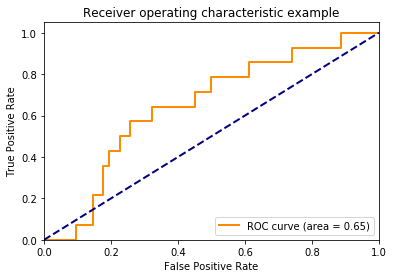

In [20]:
plt.figure()
label_idx = 1
lw = 2
plt.plot(fpr[label_idx], tpr[label_idx], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[label_idx])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()